# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


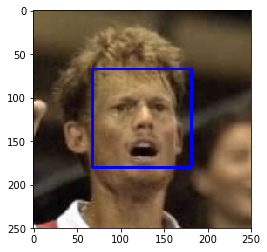

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
face_cascade.detectMultiScale detects 99% of faces in the first 100 images in human_files and 12% of faces in the first 100 images in dog_files

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
def performance_face_detector(human_files_short, dog_files_short):    
    face_human = 0
    for human_img in human_files_short:
        if face_detector(human_img):
            img = cv2.imread(human_img)
            face_human += 1 
    ratio_human = face_human/len(human_files_short)*100
    print ('{}% of faces detected in the first 100 images in human_files_short'.format(ratio_human))

    face_dog = 0
    for dog_img in dog_files_short:
        if face_detector(dog_img):
            img = cv2.imread(dog_img)
            face_dog += 1 
    ratio_dog = face_dog/len(dog_files_short)*100
    print ('{}% of faces detected in the first 100 images in dog_files_short'.format(ratio_dog))

performance_face_detector(human_files_short, dog_files_short)

100.0% of faces detected in the first 100 images in human_files_short
7.000000000000001% of faces detected in the first 100 images in dog_files_short


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
import torchvision.transforms as transforms
import torch
import torchvision.models as models


def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    img = Image.open(img_path)
    img = img.resize((224,224))
    img = transforms.ToTensor()(img)
    img = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])(img)
    img = img.unsqueeze_(0)
    return np.argmax(VGG16(img).detach().numpy())

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    prediction = VGG16_predict(img_path)
    return ((prediction <= 268) & (prediction >= 151)) # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
face_cascade.detectMultiScale detects 1.0% of faces in the first 100 images in human_files and 100% of faces in the first 100 images in dog_files

In [9]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
def performance_face_detector(human_files_short, dog_files_short):    
    face_human = 0
    for human_img in human_files_short:
        if dog_detector(human_img):
            img = cv2.imread(human_img)
            face_human += 1 
    ratio_human = face_human/len(human_files_short)*100
    print ('{}% of faces detected in the first 100 images in human_files_short'.format(ratio_human))

    face_dog = 0
    for dog_img in dog_files_short:
        if dog_detector(dog_img):
            img = cv2.imread(dog_img)
            face_dog += 1 
    ratio_dog = face_dog/len(dog_files_short)*100
    print ('{}% of faces detected in the first 100 images in dog_files_short'.format(ratio_dog))

performance_face_detector(human_files_short, dog_files_short)

1.0% of faces detected in the first 100 images in human_files_short
98.0% of faces detected in the first 100 images in dog_files_short


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [10]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.
# define VGG16 model
from PIL import Image
import torchvision.transforms as transforms
import torch
import torchvision.models as models

alexnet = models.alexnet(pretrained=True)

def alexnet_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    img = Image.open(img_path)
    img = img.resize((224,224))
    img = transforms.ToTensor()(img)
    img = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])(img)
    img = img.unsqueeze_(0)
    return np.argmax(alexnet(img).detach().numpy())


### returns "True" if a dog is detected in the image stored at img_path
def dog_detector_alexnet(img_path):
    ## TODO: Complete the function.
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    prediction = alexnet_predict(img_path)
    return ((prediction <= 268) & (prediction >= 151)) # true/false

def performance_face_detector_alexnet(human_files_short, dog_files_short):    
    face_human = 0
    for human_img in human_files_short:
        if dog_detector_alexnet(human_img):
            img = cv2.imread(human_img)
            face_human += 1 
    ratio_human = face_human/len(human_files_short)*100
    print ('{}% of faces detected in the first 100 images in human_files_short'.format(ratio_human))

    face_dog = 0
    for dog_img in dog_files_short:
        if dog_detector_alexnet(dog_img):
            img = cv2.imread(dog_img)
            face_dog += 1 
    ratio_dog = face_dog/len(dog_files_short)*100
    print ('{}% of faces detected in the first 100 images in dog_files_short'.format(ratio_dog))

performance_face_detector_alexnet(human_files_short, dog_files_short)

4.0% of faces detected in the first 100 images in human_files_short
94.0% of faces detected in the first 100 images in dog_files_short


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [11]:
import os
import torch
import torch.utils.data as data
from torchvision import datasets
from torchvision import transforms


### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# Data Aguement and Image Transformation
transforms_dog_train = transforms.Compose([
    transforms.Resize(224),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(), # randomly flip and rotate
    transforms.RandomRotation(10), # randomly rotate the image in 10 degrees
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225] )
    ])

transforms_dog_valid = transforms.Compose([
    transforms.Resize(224),
    transforms.RandomCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225] )
    ])

transforms_dog_test = transforms.Compose([
    transforms.Resize(224), 
    transforms.RandomCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225] )
    ])


# Reading Dataset
datasets = {
    'train' : datasets.ImageFolder(root='dogImages/train',
                                  transform=transforms_dog_train),
    'valid' : datasets.ImageFolder(root='dogImages/valid',
                                  transform=transforms_dog_valid),
     'test' : datasets.ImageFolder(root='dogImages/test',
                                  transform=transforms_dog_test)
}

# Loading Dataset
loaders_scratch = {
    'train' : data.DataLoader(datasets['train'], batch_size=160, shuffle=True, num_workers=14),
    'valid' : data.DataLoader(datasets['valid'], batch_size=160, num_workers=14),
     'test' : data.DataLoader(datasets['test'], batch_size=160, num_workers=14)
}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
- My code `Resize(224)` resizes the images by stretching. I pick the input tensor with width equal to 224, having slightly smaller source image is enough and reduce the calculating time consuming. 
- Yes, I use `RandomRotation()` and `RandomHorizontalFlip()` to augment the dataset to expand the training set and help avoid the overfitting.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ## TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        # Convolutional Layers
        # convolutional layer 1 (224x224x3 -> 224*224*16)
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        # convolutional layer 2 (112*112*16 -> 112*112*32)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        # convolutional layer 3 (56*56*32 -> 56*56*64)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        # convolutional layer 4 (28*28*64 -> 28*28*128)
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
        # convolutional layer 5 (14*14*128 -> 14*14*256)
        self.conv5 = nn.Conv2d(128, 256, 3, padding=1)
        
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # linear layer (7 * 7 * 256 -> 500)
        self.fc1 = nn.Linear(7 * 7 * 256, 500)
        self.fc2 = nn.Linear(500, 200)
        # dropout with 0.25 probability
        self.dropout = nn.Dropout(0.25)
    
        # batch normalize with every conv layers
        self.conv_bn1 = nn.BatchNorm2d(16)
        self.conv_bn2 = nn.BatchNorm2d(32)
        self.conv_bn3 = nn.BatchNorm2d(64)
        self.conv_bn4 = nn.BatchNorm2d(128)
        self.conv_bn5 = nn.BatchNorm2d(256)
    
    
    def forward(self, x):
        ## Define forward behavior
        # add sequence of convolutional, max pooling layers, batch normalize and dropout
        x = self.pool(F.relu(self.conv1(x)))
        x = self.conv_bn1(x)
        x = self.dropout(x)
                      
        x = self.pool(F.relu(self.conv2(x)))
        x = self.conv_bn2(x)
        x = self.dropout(x)
                      
        x = self.pool(F.relu(self.conv3(x)))
        x = self.conv_bn3(x)
        x = self.dropout(x)
        
        
        x = self.pool(F.relu(self.conv4(x)))
        x = self.conv_bn4(x)
        x = self.dropout(x)
        
        x = self.pool(F.relu(self.conv5(x)))
        x = self.conv_bn5(x)
        x = self.dropout(x)
        
        # flatten image input
        x = x.view(-1, 7 * 7 * 256)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
    

        return x

use_cuda = torch.cuda.is_available
# #-#-# You so NOT have to modify the code below this line. #-#-#

# # instantiate the CNN
model_scratch = Net()
print(model_scratch)
# # move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=12544, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=200, bias=True)
  (dropout): Dropout(p=0.25)
  (conv_bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_sta

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
Five CNN layers with the smae `kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)`（Highlight features without changing image size） ReLU activate function and each CNN layers will dropout with 25%（avoid overfitting）, after each conv layers will have a batch normalizing（improve convergence） and maxpooling.   
At the end, use an full connect layer to classifer. Because there have near 118 breeds of dog, so I choice more than 118 outputs in full connect layer.  

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [13]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [14]:
import numpy as np
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
        
        # calculate average losses
        train_loss = train_loss / len(loaders['train'].dataset)
        valid_loss = valid_loss / len(loaders['valid'].dataset)
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased


        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                valid_loss_min,
                valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
        
    # return trained model
    return model


# train the model
model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 0.000914 	Validation Loss: 0.007263
Validation loss decreased (inf --> 0.007263).  Saving model ...
Epoch: 2 	Training Loss: 0.000822 	Validation Loss: 0.006947
Validation loss decreased (0.007263 --> 0.006947).  Saving model ...
Epoch: 3 	Training Loss: 0.000741 	Validation Loss: 0.006807
Validation loss decreased (0.006947 --> 0.006807).  Saving model ...
Epoch: 4 	Training Loss: 0.000691 	Validation Loss: 0.006635
Validation loss decreased (0.006807 --> 0.006635).  Saving model ...
Epoch: 5 	Training Loss: 0.000662 	Validation Loss: 0.006537
Validation loss decreased (0.006635 --> 0.006537).  Saving model ...
Epoch: 6 	Training Loss: 0.000645 	Validation Loss: 0.006376
Validation loss decreased (0.006537 --> 0.006376).  Saving model ...
Epoch: 7 	Training Loss: 0.000631 	Validation Loss: 0.006364
Validation loss decreased (0.006376 --> 0.006364).  Saving model ...
Epoch: 8 	Training Loss: 0.000620 	Validation Loss: 0.006240
Validation loss decreased (0.00636

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [15]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.
    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 4.312667


Test Accuracy: 14% (121/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [16]:
## TODO: Specify data loaders
import os
import torch
import torch.utils.data as data
from torchvision import datasets
from torchvision import transforms


### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# Data Aguement and Image Transformation
transforms_dog_train = transforms.Compose([
    transforms.Resize(224),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(), # randomly flip and rotate
    transforms.RandomRotation(10), # randomly rotate the image in 10 degrees
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225] )
    ])

transforms_dog_valid = transforms.Compose([
    transforms.Resize(224),
    transforms.RandomCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225] )
    ])

transforms_dog_test = transforms.Compose([
    transforms.Resize(224), 
    transforms.RandomCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225] )
    ])


# Reading Dataset
datasets = {
    'train' : datasets.ImageFolder(root='dogImages/train',
                                  transform=transforms_dog_train),
    'valid' : datasets.ImageFolder(root='dogImages/valid',
                                  transform=transforms_dog_valid),
     'test' : datasets.ImageFolder(root='dogImages/test',
                                  transform=transforms_dog_test)
}

# Loading Dataset
loaders_transfer = {
    'train' : data.DataLoader(datasets['train'], batch_size=60, shuffle=True, num_workers=10),
    'valid' : data.DataLoader(datasets['valid'], batch_size=60, num_workers=10),
     'test' : data.DataLoader(datasets['test'], batch_size=60, num_workers=10)
}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [17]:
import torch
import torchvision.models as models
import torch.nn as nn
from glob import glob

## TODO: Specify model architecture 
# Load the pretrained model from pytorch
vgg16 = models.vgg16(pretrained=True)

# list the dog names
dog_names = [item[20:-1] for item in sorted(glob("dogImages/train/*/"))]

n_inputs = vgg16.classifier[6].in_features

# add last linear layer (n_inputs -> 5 flower classes)
# new layers automatically have requires_grad = True
last_layer = nn.Linear(n_inputs, len(dog_names))

vgg16.classifier[6] = last_layer

# print out the model structure
print(vgg16)


# check if CUDA is available
use_cuda = torch.cuda.is_available()

if use_cuda:
    model_transfer = vgg16.cuda()
    


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ I use vgg16, and because the input datasets is similar and not very large, so I can slice off the end of the neural network and add a new fully connected layer that matches the new dataset.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [18]:
criterion_transfer = torch.nn.CrossEntropyLoss()
optimizer_transfer = torch.optim.SGD(vgg16.classifier.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [19]:
# train the model
# model_transfer = vgg16()
# train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
#model_transfer.load_state_dict(torch.load('model_transfer.pt'))



import numpy as np
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
        
        # calculate average losses
        train_loss = train_loss / len(loaders['train'].dataset)
        valid_loss = valid_loss / len(loaders['valid'].dataset)
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased

        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                valid_loss_min,
                valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
        
    # return trained model
    return model


# train the model
model_transfer = train(100, loaders_transfer, model_transfer, optimizer_transfer, 
                      criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 0.000694 	Validation Loss: 0.004851
Validation loss decreased (inf --> 0.004851).  Saving model ...
Epoch: 2 	Training Loss: 0.000565 	Validation Loss: 0.003765
Validation loss decreased (0.004851 --> 0.003765).  Saving model ...
Epoch: 3 	Training Loss: 0.000434 	Validation Loss: 0.002719
Validation loss decreased (0.003765 --> 0.002719).  Saving model ...
Epoch: 4 	Training Loss: 0.000324 	Validation Loss: 0.001924
Validation loss decreased (0.002719 --> 0.001924).  Saving model ...
Epoch: 5 	Training Loss: 0.000250 	Validation Loss: 0.001469
Validation loss decreased (0.001924 --> 0.001469).  Saving model ...
Epoch: 6 	Training Loss: 0.000206 	Validation Loss: 0.001186
Validation loss decreased (0.001469 --> 0.001186).  Saving model ...
Epoch: 7 	Training Loss: 0.000177 	Validation Loss: 0.001027
Validation loss decreased (0.001186 --> 0.001027).  Saving model ...
Epoch: 8 	Training Loss: 0.000157 	Validation Loss: 0.000910
Validation loss decreased (0.00102

Epoch: 95 	Training Loss: 0.000037 	Validation Loss: 0.000423
Epoch: 96 	Training Loss: 0.000039 	Validation Loss: 0.000442
Epoch: 97 	Training Loss: 0.000037 	Validation Loss: 0.000446
Epoch: 98 	Training Loss: 0.000036 	Validation Loss: 0.000444
Epoch: 99 	Training Loss: 0.000035 	Validation Loss: 0.000430
Epoch: 100 	Training Loss: 0.000036 	Validation Loss: 0.000447


IncompatibleKeys(missing_keys=[], unexpected_keys=[])

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [20]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))
    
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.424725


Test Accuracy: 86% (719/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [21]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
# class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].classes]
import cv2
from PIL import Image
import matplotlib.pyplot as plt                        
from torch.autograd import Variable



dog_names = [item[20:-1] for item in sorted(glob("dogImages/train/*/"))]

def predict_breed_transfer(img_path):
    ## load the image and return the predicted breed
    
    image = Image.open(img_path)

    # Define transformations for the image
    transformation = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    
    # Preprocess the image
    image_tensor = transformation(image).float()

    # Add an extra batch dimension since pytorch treats all images as batches
    image_tensor = image_tensor.unsqueeze_(0)


    # Turn the input into a Variable
    input = Variable(image_tensor).cuda()

    # Return the top predictions and confidence scores
    output = model_transfer(input)
    softmax = nn.Softmax(dim=1)
    preds = softmax(output)
    top_preds = torch.topk(preds, 3)
    pred_breeds = [dog_names[i] for i in top_preds[1][0]]
    confidence = top_preds[0][0]
    
    
    return print("The breed of dog is a {}".format(pred_breeds))

predict_breed_transfer("dogImages/test/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08237.jpg")

The breed of dog is a ['Welsh_springer_spaniel', 'Irish_red_and_white_setter', 'Brittany']


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [5]:
## TODO: Specify data loaders
import os
import torch
import torch.utils.data as data
from torchvision import datasets
from torchvision import transforms


### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# Data Aguement and Image Transformation
transforms_dog_train = transforms.Compose([
    transforms.Resize(224),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(), # randomly flip and rotate
    transforms.RandomRotation(10), # randomly rotate the image in 10 degrees
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225] )
    ])

transforms_dog_valid = transforms.Compose([
    transforms.Resize(224),
    transforms.RandomCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225] )
    ])

transforms_dog_test = transforms.Compose([
    transforms.Resize(224), 
    transforms.RandomCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225] )
    ])


# Reading Dataset
datasets = {
    'train' : datasets.ImageFolder(root='dogImages/train',
                                  transform=transforms_dog_train),
    'valid' : datasets.ImageFolder(root='dogImages/valid',
                                  transform=transforms_dog_valid),
     'test' : datasets.ImageFolder(root='dogImages/test',
                                  transform=transforms_dog_test)
}

# Loading Dataset
loaders_mine = {
    'train' : data.DataLoader(datasets['train'], batch_size=40, shuffle=True, num_workers=13),
    'valid' : data.DataLoader(datasets['valid'], batch_size=40, num_workers=13),
     'test' : data.DataLoader(datasets['test'], batch_size=40, num_workers=13)
}

In [6]:
import torch
import torchvision.models as models
import torch.nn as nn
from glob import glob

## TODO: Specify model architecture 
# Load the pretrained model from pytorch
vgg16_bn = models.vgg16_bn(pretrained=True)

# list the dog names
dog_names = [item[20:-1] for item in sorted(glob("dogImages/train/*/"))]

n_inputs = vgg16_bn.classifier[6].in_features

# add last linear layer (n_inputs -> 5 flower classes)
# new layers automatically have requires_grad = True
last_layer = nn.Linear(n_inputs, len(dog_names))

vgg16_bn.classifier[6] = last_layer

# print out the model structure
print(vgg16_bn)


# check if CUDA is available
use_cuda = torch.cuda.is_available()

if use_cuda:
    model_mine = vgg16_bn.cuda()
  

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3)

In [7]:
criterion_mine = torch.nn.CrossEntropyLoss()
optimizer_mine = torch.optim.SGD(vgg16_bn.classifier.parameters(), lr=0.001)

In [8]:
import numpy as np
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
        
        # calculate average losses
        train_loss = train_loss / len(loaders['train'].dataset)
        valid_loss = valid_loss / len(loaders['valid'].dataset)
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased

        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                valid_loss_min,
                valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
        
    # return trained model
    return model


# train the model
model_mine = train(100, loaders_mine, model_mine, optimizer_mine, 
                      criterion_mine, use_cuda, 'model_mine.pt')

# load the model that got the best validation accuracy
model_mine.load_state_dict(torch.load('model_mine.pt'))

Epoch: 1 	Training Loss: 0.000704 	Validation Loss: 0.005264
Validation loss decreased (inf --> 0.005264).  Saving model ...
Epoch: 2 	Training Loss: 0.000631 	Validation Loss: 0.004615
Validation loss decreased (0.005264 --> 0.004615).  Saving model ...
Epoch: 3 	Training Loss: 0.000551 	Validation Loss: 0.003899
Validation loss decreased (0.004615 --> 0.003899).  Saving model ...
Epoch: 4 	Training Loss: 0.000465 	Validation Loss: 0.003175
Validation loss decreased (0.003899 --> 0.003175).  Saving model ...
Epoch: 5 	Training Loss: 0.000383 	Validation Loss: 0.002550
Validation loss decreased (0.003175 --> 0.002550).  Saving model ...
Epoch: 6 	Training Loss: 0.000319 	Validation Loss: 0.002087
Validation loss decreased (0.002550 --> 0.002087).  Saving model ...
Epoch: 7 	Training Loss: 0.000270 	Validation Loss: 0.001751
Validation loss decreased (0.002087 --> 0.001751).  Saving model ...
Epoch: 8 	Training Loss: 0.000235 	Validation Loss: 0.001502
Validation loss decreased (0.00175

Epoch: 86 	Training Loss: 0.000055 	Validation Loss: 0.000495
Epoch: 87 	Training Loss: 0.000053 	Validation Loss: 0.000517
Epoch: 88 	Training Loss: 0.000053 	Validation Loss: 0.000485
Validation loss decreased (0.000493 --> 0.000485).  Saving model ...
Epoch: 89 	Training Loss: 0.000052 	Validation Loss: 0.000495
Epoch: 90 	Training Loss: 0.000051 	Validation Loss: 0.000498
Epoch: 91 	Training Loss: 0.000053 	Validation Loss: 0.000486
Epoch: 92 	Training Loss: 0.000052 	Validation Loss: 0.000505
Epoch: 93 	Training Loss: 0.000051 	Validation Loss: 0.000531
Epoch: 94 	Training Loss: 0.000051 	Validation Loss: 0.000503
Epoch: 95 	Training Loss: 0.000052 	Validation Loss: 0.000516
Epoch: 96 	Training Loss: 0.000051 	Validation Loss: 0.000510
Epoch: 97 	Training Loss: 0.000048 	Validation Loss: 0.000520
Epoch: 98 	Training Loss: 0.000052 	Validation Loss: 0.000516
Epoch: 99 	Training Loss: 0.000050 	Validation Loss: 0.000505
Epoch: 100 	Training Loss: 0.000050 	Validation Loss: 0.000514


IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [9]:
import torch
import torch.nn as nn
import torchvision.models as models
from glob import glob



dog_names = [item[20:-1] for item in sorted(glob("dogImages/train/*/"))]

vgg16_bn = models.vgg16_bn(pretrained=False)
n_inputs = vgg16_bn.classifier[6].in_features

last_layer = nn.Linear(n_inputs, len(dog_names))

vgg16_bn.classifier[6] = last_layer

model_mine = vgg16_bn.cuda()

model_mine.load_state_dict(torch.load('model_mine.pt'))
model_mine.eval()

print(model_mine)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3)

In [10]:
from glob import glob
import numpy as np

criterion_mine = torch.nn.CrossEntropyLoss()
optimizer_mine = torch.optim.SGD(vgg16_bn.classifier.parameters(), lr=0.001)

def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))
test(loaders_mine, model_mine, criterion_mine, use_cuda)

Test Loss: 0.473733


Test Accuracy: 84% (710/836)


In [11]:
from PIL import Image
import matplotlib.pyplot as plt                        
from torch.autograd import Variable
import numpy as np
import torchvision.models as models

def predict_breed_mine(image_path):
    '''Predicts the top 3 most likely breeds for a given image.'''
    
    image = Image.open(image_path)

    # Define transformations for the image
    transformation = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # Preprocess the image
    image_tensor = transformation(image).float()

    # Add an extra batch dimension since pytorch treats all images as batches
    image_tensor = image_tensor.unsqueeze_(0)


    # Turn the input into a Variable
    input = Variable(image_tensor).cuda()

    # Return the top predictions and confidence scores
    output = model_mine(input)
    softmax = nn.Softmax(dim=1)
    preds = softmax(output)
    top_preds = torch.topk(preds, 1)
    pred_breeds = [dog_names[i] for i in top_preds[1][0]]
    confidence = top_preds[0][0]
        
    return pred_breeds


In [12]:
import cv2
import torchvision.transforms as transforms
import torch
import torchvision.models as models
from PIL import Image
from pylab import imshow
%matplotlib inline



dog_names = [item[20:-1] for item in sorted(glob("dogImages/train/*/"))]
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

VGG16 = models.vgg16(pretrained=True)

def VGG16_predict(img_path):
    img = Image.open(img_path)
    img = img.resize((224,224))
    img = transforms.ToTensor()(img)
    img = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])(img)
    img = img.unsqueeze_(0)
    return np.argmax(VGG16(img).detach().numpy())

def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

def dog_detector(img_path):
    ## TODO: Complete the function.
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    prediction = VGG16_predict(img_path)
    return ((prediction <= 268) & (prediction >= 151)) # true/false

def showImage(img_path):
    im = Image.open(img_path)
    imshow(im)
    


In [31]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    
    '''Detects whether an image contains a human or a dog. If the image contains a dog, the 
    most likely breeds are returned. If the image contains a human, the closest resembling dog
    breeds are returned.'''
    
    if face_detector(img_path):
        print("hello, human")
        showImage(img_path)
        dogname = predict_breed_mine(img_path)
        print("You look like a %s" % dogname)
    else:
        if dog_detector(img_path):
            im = Image.open(img_path)
            showImage(img_path)
            dogname = predict_breed_mine(img_path)
            print("You look like a %s" % dogname)
        else:
            showImage(img_path)
            print("I can not determine what you are.")



---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)
The output is better than my expected. It can predict the dog's breed accurately. But have some weakness need to improve at list:
- An image which has human and dog faces will have some mistakes at detector. You can see the third image below, the image not only have a human inside but a dog, but it only can detect the human. I think it is the question about my program.
- I think the color of image play an important role in training, the final model will predict different answers on same human face in two different color temperture images.
- Glasses are a big distracting item, but after the subject is wearing glasses, the answer with a high probability is dachshund. Of course, the dachshund family is also huge.

In [ ]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
# for file in np.hstack((human_files[:3], dog_files[:3])):
#     run_app(file)

In [36]:
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

hello, human
You look like a ['Canaan_dog']


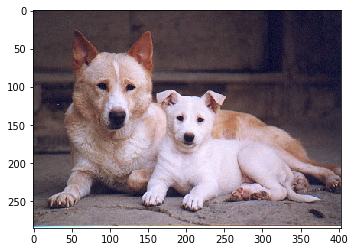

In [32]:
run_app(dog_files[59])

You look like a ['Pomeranian']


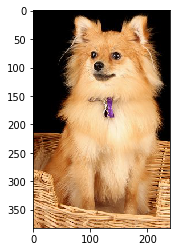

In [33]:
run_app(dog_files[99])

You look like a ['Entlebucher_mountain_dog']


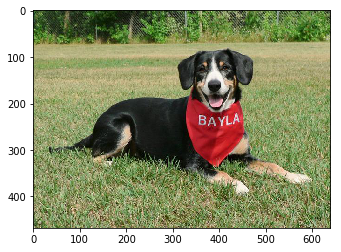

In [34]:
run_app(dog_files[9])

hello, human
You look like a ['Silky_terrier']


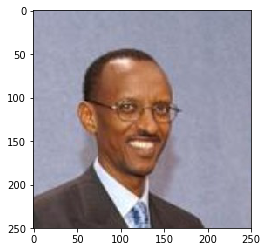

In [64]:
run_app(human_files[1900])

hello, human
You look like a ['Labrador_retriever']


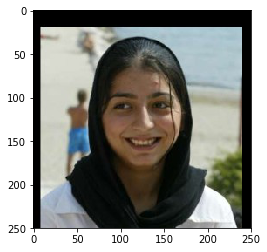

In [65]:
run_app(human_files[900])

hello, human
You look like a ['Afghan_hound']


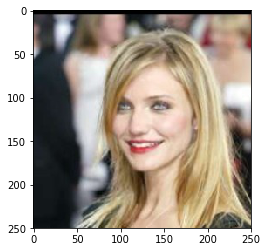

In [71]:
run_app(human_files[2001])

hello, human
You look like a ['Chesapeake_bay_retriever']


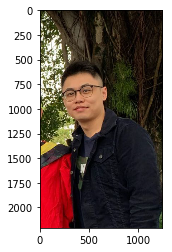

In [51]:
run_app('bourne.jpeg')

hello, human
You look like a ['Cocker_spaniel']


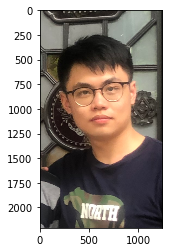

In [60]:
run_app('bourne2.jpeg')

hello, human
You look like a ['Dachshund']


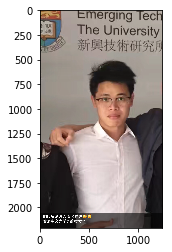

In [58]:
run_app('Wu2.png')

hello, human
You look like a ['Chinese_crested']


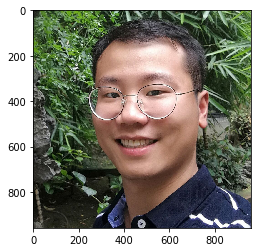

In [48]:
run_app('tony.jpeg')

hello, human
You look like a ['Dogue_de_bordeaux']


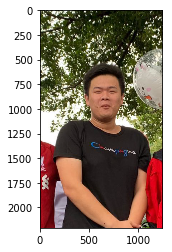

In [49]:
run_app('dong.png')